In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit 
import pandas as pd 
from tqdm import tqdm 
from scipy.signal import find_peaks
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
from scipy import signal

In [4]:
folder_path = 'data\\filter_csv_files'


csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = {}

for file_name in csv_files:
    
    name = os.path.splitext(file_name)[0]
    df = pd.read_csv(os.path.join(folder_path, file_name), skiprows= 47) 
    dfs[name] = df

In [5]:

def filter_me_daddy(y,  step_size = 10,  cutoff_freq  = 5 , sampling_freq = 100):
    nyquist_freq = 0.5 * sampling_freq
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = signal.butter(4, normalized_cutoff_freq, 'low')
    filtered_data = signal.filtfilt(b, a, y)
    return filtered_data/max(filtered_data)

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)




def estimate_my_peaks(wavelengths, signal_amplitudes , peak_threshold = 0.7):
    """returns the index of the peaks"""
    peaks,_ = find_peaks(signal_amplitudes, peak_threshold)
    wavelength_est = wavelengths[peaks[0]]
    amplitude_est = signal_amplitudes[peaks[0]]
    return wavelength_est, amplitude_est


def find_my_peaks_father(x_data, y_data, error = False):
    
    mean_w_est, amp_est = estimate_my_peaks(x_data, y_data)
    initial_guess = [amp_est, mean_w_est, 0.2]
    params, covariance = curve_fit(gaussian, x_data, y_data, p0=initial_guess)
    
    if error  == True:
        return params, covariance
    else:
        return params

  0%|          | 0/5 [00:00<?, ?it/s]C:\Users\yx200\AppData\Local\Temp\ipykernel_11280\592274344.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = np.array([float(values) for values in df.values[:-2] ])
100%|██████████| 5/5 [00:00<00:00, 95.07it/s]


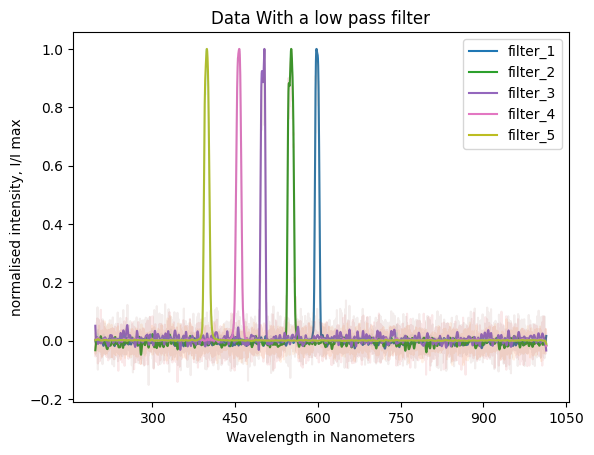

In [6]:
plt.figure()
plt.title('Data With a low pass filter')

for name, df in tqdm(dfs.items()):
    x  = np.array([float(values) for values in df.index[:-2] ])
    y = np.array([float(values) for values in df.values[:-2] ])
    y = y/max(y)
    
    
    filtered_data = filter_me_daddy(y)
    
    # mean_estimator in action 
#     mean,amp =  estimate_my_peaks(x, filtered_data)
#     plt.plot(mean, amp, 'x')
    
    plt.plot(x, filtered_data, label = '{name}'.format(name = name) )
    plt.plot(x, y, alpha = 0.1) #label = '{name}'.format(name = name), alpha = 0.2)
        

formatter = ScalarFormatter(useMathText=True)
# formatter.set_powerlimits((3, 3))
plt.xlabel('Wavelength in Nanometers')
plt.ylabel('normalised intensity, I/I max')
plt.gca().xaxis.set_major_locator(MultipleLocator(150))
plt.gca().xaxis.set_major_formatter(formatter)


plt.legend()
plt.show()

[  1.09729715 598.68993676   3.17365998]


C:\Users\yx200\AppData\Local\Temp\ipykernel_11280\1097525050.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_y = np.array([float(values) for values in filter_2.values[:-2] ])


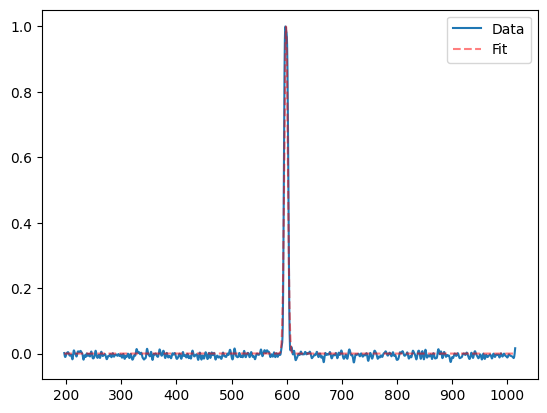

In [7]:
filter_2 = dfs['filter_1']    # change 1 to 5
test_x = np.array([float(values) for values in filter_2.index[:-2] ])
test_y = np.array([float(values) for values in filter_2.values[:-2] ])


test_y = test_y/max(test_y)

filte_y = filter_me_daddy(test_y)



params = find_my_peaks_father(test_x, filte_y)
print(params)



plt.plot(test_x, filte_y, label='Data')
plt.plot(test_x, gaussian(test_x, 1, params[1], params[2]), color='red', label='Fit', alpha = 0.5, linestyle = 'dashed')
plt.legend()
plt.show()

C:\Users\yx200\AppData\Local\Temp\ipykernel_11280\2017682511.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  amplitudes = np.array([float(values) for values in df.values[:-2] ])


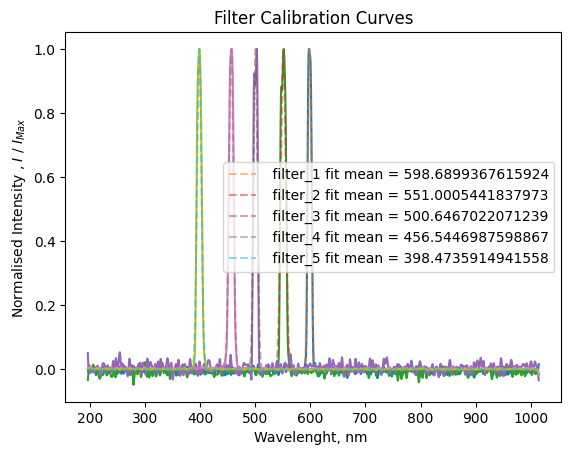

In [12]:
plt.figure()
plt.title('Filter Calibration Curves')
for name, df in dfs.items():
    wavelengths  = np.array([float(values) for values in df.index[:-2] ])
    amplitudes = np.array([float(values) for values in df.values[:-2] ])
    amplitudes = amplitudes/max(amplitudes)
    
    signal_filtered = filter_me_daddy(amplitudes)
    parameters  = find_my_peaks_father(wavelengths, signal_filtered)
    
    plt.plot(wavelengths, signal_filtered)
    plt.plot(wavelengths, gaussian(wavelengths, 1, parameters[1], parameters[2]), 
             alpha = 0.5, linestyle = 'dashed', 
             label = ' {filter_name} fit mean = {mean}'.format(filter_name = name, mean = parameters[1]))
    plt.legend()
   
plt.ylabel('Normalised Intensity , $I$ / $I_{Max}$')
plt.xlabel('Wavelenght, nm ')
plt.show()    